# NLE Assessed Coursework 1

For this assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about these coursework questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.

In [2]:
candidateno=198735 #this MUST be updated to your candidate number so that you get a unique data sample


In [3]:
#preliminary imports
import sys
#sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
#sys.path.append(r'/Users/juliewe/resources')
sys.path.append(r'/Users/Joe/Documents/Python Scripts/resources/resources')

import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.tokenize import word_tokenize

from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
import random
from nltk.corpus import stopwords

Sussex NLTK root directory is /Users/Joe/Documents/Python Scripts/resources/resources


# Question 1: Naive Bayes Classification (25 marks)

In this question, you will be considering how a Naive Bayes classifier can be applied to the task of deciding whether sentences are relevant or not relevant to the kitchen domain.

The code below will generate for you two small unique sets of sentences, which you should refer to in your answer to this question.   This question will be marked on the quality of your explanations rather than the quality of your code.

In [3]:
#Do NOT change the code in this cell.

topics=["book","kitchen","dvd","electronics"]
samplesize=20
stop=stopwords.words('english')

trainingsentences=[]
testsentences=[]
cr = AmazonReviewCorpusReader()

for topic in topics:
    random.seed(candidateno)
    if topic == "kitchen":
        key="kitchen"
    else:
        key="not-kitchen"
    topicsentences=[]
    while len(topicsentences)<10:
        topicsentences=[({token.lower():True for token in doc if token not in stop and token.isalpha()},key) for doc in cr.category(topic).sample_sents(samplesize=samplesize) if len(doc)>0]
    testsentences+=topicsentences[0:3]
    trainingsentences+=topicsentences[3:]

random.shuffle(trainingsentences)
mixup=testsentences[:4]+testsentences[5:]
random.shuffle(mixup)
testsentences=[testsentences[4]]+mixup
print("Number of training sentences is {}.  Number of testing sentences is {}".format(len(trainingsentences),len(testsentences)))


Number of training sentences is 57.  Number of testing sentences is 12


In [4]:
trainingsentences[1]

({'when': True,
  'i': True,
  'saw': True,
  'picture': True,
  'revere': True,
  'covered': True,
  'saucepan': True,
  'double': True,
  'boiler': True,
  'insert': True,
  'knew': True,
  'looking': True},
 'kitchen')

In [5]:
testsentences[0]

({'for': True, 'price': True, 'great': True}, 'kitchen')

a) With reference to the sentences generated above, **explain** how a Naive Bayes classifer would be trained to carry out the task of deciding whether sentences are relevant to the kitchen domain.  You do **not** need to build or train a classifier.  However, you should explain the relevant probabilities with reference to examples taken from your samples of sentences.  \[10 marks\]

There are 3 parts to training a Naive Bayes classifier: 
* The first is working out the class prior probabities, which are the probabilities before any words are considered, this is done by taking the proportion of sentences for a particular domain, in order to eliminate 0 probability, 1 is added to both domains, kitchen and not-kitchen. 
* The second is working out the conditional probabilities of each word relating to that domain, for example, 'saucepan' is a kitchen word. The probability of seeing 'saucepan' in a kitchen document is, the amount of times it had been seen in the training data over the total number of words in the training data. It is over all words to eliminate 0 probabilities. The 'saucepan' probability will be the value of the key 'saucepan' in the dictionary for words relating to kitchen.
* Finally, we need to create a set of all known words, done by taking in each word in training data and adding it to the set, so that if the test data contains any new words we can ignore them in order to classify correctly. 

Once this is done, all three return values are used to then correctly classify a document.

b) With reference to the sentences generated above, **explain** how a trained Naive Bayes classifier would assign a class to a sentence. \[5 marks\]

If the test sentence was "for price great", the sentence would be classed as the document. The prior probabilities are set as the probabilities for the document being of that domain; kitchen or non-kitchen. The classifier would then look at each word in the document in turn starting with "for". If the word is a known word it will find the probability of that word being kitchen and the proability of the word being not-kitchen. Both are added to the respective probabilities. Once there are no more words, the domain with the highest probability is returned.

c) The labels assigned by a Naive Bayes classifier to the sentences contained in the variable `testsentences` above are \['kitchen','not-kitchen','not-kitchen','not-kitchen','kitchen','not-kitchen','kitchen','not-kitchen','not-kitchen','not-kitchen','kitchen','not-kitchen'\].  Using this example to illustrate your answer, **explain** how each of the performance metrics of *accuracy*, *precision*, *recall* and *F1-score* are calculated.  Which of these metrics would you use to choose between classification models in this example?  **Justify your answer**. \[10 marks\]


Before calculating each performance metric, True positive and negative, and false positive and negative need to be calculated. This is done by taking the outputs seen above and comparing them with the original classification by hand, if Kitchen is equal to kitchen then this is a true positive. If not-kitchen is equal to not-kitchen this is added to true negative. If kitchen is compared with non-kitchen this is false positive and finally if not-kitchen is compared with kitchen then this is false negative. The performance metrics are calculated as follows:
* Accuracy is True positive and True negative added together and divided by the total number of sentences tested.
* Precision is calculated by taking the true positives and dividing this by the total number of positives (True positive + False negative)
* Recall is calculated by taking the true positives and dividing this by the true positives + the false negatives
* F1 Score is calculated by taking the values of precision and recall multiplying them together multiplying that by 2 and dividing the result by the precision added to the recall.

Using the F1-score is the best way to choose between classification models in this example as it focuses on weather something is or isn't related to a kitchen so is either positive or negative. Also, it uses the amount of classifications it got correct along with the proportion of documents that are predicted correctly giving a overall well rounded idea of how good that classifier is.

## Question 2: Training Data for Sentiment Analysis (25 marks)
The objective of this question is to investigate the extent to which performance of a Naive Bayes classifier is affected by the quantity and quality of the training data.  Does more training data mean better performance?  Is performance degraded if we train on one domain and test on another domain?  For example, suppose we train a sentiment classifier on book reviews and then test that classifier on a collection of dvd reviews. Does it perform as well as it would when trained on dvd reviews?

The code below is included to enable you to get pre-formatted training and test data for a given category (evenly split between positive and negative reviews).  In this question, there are marks available for the quality of your programming, your experimental design and your interpretation of results.


In [4]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the 
            pair is a list of the training data and the second is a list of the test data.
    """
    
    data = list(data)  
    n = len(data)  
    train_indices = random.sample(range(n), int(n * ratio))          
    test_indices = list(set(range(n)) - set(train_indices))    
    train = [data[i] for i in train_indices]           
    test = [data[i] for i in test_indices]             
    return (train, test)                       
 

def feature_extract(review):
    """
    Generate a feature representation for a review
    :param review: AmazonReview object
    :return: dictionary of Boolean features
    """
    return {word:True for word in review.words()}

def get_training_test_data(category,ratio=0.7,seed=candidateno):
    """
    Get training and test data for a given category and ratio, pre-formatted for use with NB classifier
    :param category: category of review corpus, one of ["kitchen, "dvd, "book", "electronics"]
    :param ratio: proportion of data to use as training data
    :return: pair of lists 
    """
    reader=AmazonReviewCorpusReader().category(category)
    random.seed(candidateno)
    pos_train, pos_test = split_data(reader.positive().documents(),ratio=ratio)
    neg_train, neg_test = split_data(reader.negative().documents(),ratio=ratio)
    train_data=[(feature_extract(review),'P')for review in pos_train]+[(feature_extract(review),'N') for review in neg_train]
    test_data=[(feature_extract(review),'P')for review in pos_test]+[(feature_extract(review),'N') for review in neg_test]
    return train_data,test_data


In [6]:
train, test = get_training_test_data("dvd")
print(len(train))
print(len(test))
train, test = get_training_test_data("kitchen")
print(len(train))
print(len(test))
train, test = get_training_test_data("book")
print(len(train))
print(len(test))
train, test = get_training_test_data("electronics")
print(len(train))
print(len(test))

1400
600
1400
600
1400
600
1400
600


a) By varying the amount of training data used, **investigate** the impact of the amount of training data used on the accuracy of a Naive Bayes classifier for each of the four domains: *dvd*, *book*, *kitchen* and *electronics*.  You should use the NaiveBayesClassifier from the `nltk.classify` library.  You should also use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

In [16]:
""" RUN EACH CODE CELL IN TURN - DONE FOR EFFICIENCY WHILST CODING """
# SETUP #
# creates test and training data - takes a while
# Use of different sized ratios for greater scope on the problem
# Ratios of 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575 0.6, 0.625, 0.65, 0.675, 0.7, 0.725 and 0.75
domains = 4
ratios = 21
ratio = 0.25
train_data = [[[] for i in range(ratios)] for j in range(domains)]
test_data = [[[] for i in range (ratios)] for j in range(domains)]

for i in range(ratios):
    train_data[0][i], test_data[0][i] = get_training_test_data("electronics", ratio)
    train_data[1][i], test_data[1][i] = get_training_test_data("dvd", ratio)
    train_data[2][i], test_data[2][i] = get_training_test_data("kitchen", ratio)
    train_data[3][i], test_data[3][i] = get_training_test_data("book", ratio)
    print("Just got training/test data for ratio: {}".format(ratio))
    ratio = float(str(ratio + 0.025) [0:5])


Just got training/test data for ratio: 0.25
Just got training/test data for ratio: 0.275
Just got training/test data for ratio: 0.3
Just got training/test data for ratio: 0.325
Just got training/test data for ratio: 0.35
Just got training/test data for ratio: 0.375
Just got training/test data for ratio: 0.4
Just got training/test data for ratio: 0.425
Just got training/test data for ratio: 0.45
Just got training/test data for ratio: 0.475
Just got training/test data for ratio: 0.5
Just got training/test data for ratio: 0.525
Just got training/test data for ratio: 0.55
Just got training/test data for ratio: 0.575
Just got training/test data for ratio: 0.6
Just got training/test data for ratio: 0.625
Just got training/test data for ratio: 0.65
Just got training/test data for ratio: 0.675
Just got training/test data for ratio: 0.7
Just got training/test data for ratio: 0.725
Just got training/test data for ratio: 0.75


In [17]:
# TRAINING #
# trains the data using different ratios for different training sizes
# 500  sample for ratio 0.25
# 550  sample for ratio 0.275
# 600  sample for ratio 0.3
# 650  sample for ratio 0.325
# 700  sample for ratio 0.35
# 750  sample for ratio 0.375
# 800  sample for ratio 0.4
# 850  sample for ratio 0.425
# 900  sample for ratio 0.45
# 950  sample for ratio 0.475
# 1000 sample for ratio 0.5
# 1050 sample for ratio 0.525
# 1100 sample for ratio of 0.55
# 1150 sample for ratio of 0.575
# 1200 sample for ratio of 0.6
# 1250 sample for ratio of 0.625
# 1300 sample for ratio of 0.65
# 1350 sample for ratio of 0.675
# 1400 sample for ratio of 0.7
# 1450 sample for ratio of 0.725
# 1500 sample for ratio of 0.75
import nltk.classify
classifiers = [[nltk.NaiveBayesClassifier for x in range(ratios)] for y in range(domains)]

for i in range(ratios):
    classifiers[0][i] = nltk.NaiveBayesClassifier.train(train_data[0][i])
    classifiers[1][i] = nltk.NaiveBayesClassifier.train(train_data[1][i])
    classifiers[2][i] = nltk.NaiveBayesClassifier.train(train_data[2][i])
    classifiers[3][i] = nltk.NaiveBayesClassifier.train(train_data[3][i])


In [18]:
# CLASSIFY #
# classifies each classifier with the same test data for that domain into lists of their classification 
classified_list = [[[""] for x in range(ratios)] for y in range(domains)]

for i in range(ratios):
    classified_list[0][i] = classifiers[0][i].classify_many([tuples[0] for tuples in test_data[0][i]])
    classified_list[1][i] = classifiers[1][i].classify_many([tuples[0] for tuples in test_data[1][i]])
    classified_list[2][i] = classifiers[2][i].classify_many([tuples[0] for tuples in test_data[2][i]])
    classified_list[3][i] = classifiers[3][i].classify_many([tuples[0] for tuples in test_data[3][i]])


In [19]:
# ANALYSIS of Accuracy #
# TP = positive and positive when compared 
# TN = negative and negative when compared
# total = length of tested list

acc_list = [[0 for x in range(ratios)] for y in range(domains)]

# Finds accuracy given the lists to compare
def find_acc(test_list, result_list):
    j = 0
    tp = 0
    tn = 0
    for result in result_list:
        if result == 'P':
            if result == test_list[j][1]:
                tp += 1
        else:
            if result == test_list[j][1]:
                tn += 1
        j += 1    
    return (tp + tn)/len(result_list)

for i in range(ratios):
    acc_list[0][i] = find_acc(test_data[0][i], classified_list[0][i])
    acc_list[1][i] = find_acc(test_data[1][i], classified_list[1][i])
    acc_list[2][i] = find_acc(test_data[2][i], classified_list[2][i])
    acc_list[3][i] = find_acc(test_data[3][i], classified_list[3][i])
        

In [20]:
# ANALYSIS of F1-score #
# TP = positive and positive when compared 
# FN = positive and negative when compared
# FP = negative and positive when compared
# p = TP / (TP + FP)
# r = TP / (TP + FN)
# F1 = (2 * p * r)/ (p + r)
# prediction vs label

F1_list = [[0 for x in range(ratios)] for y in range(domains)]

# Finds F1 given the lists to compare
def find_F1(test_list, result_list):
    j = 0
    tp = 0
    fp = 0
    fn = 0
    for result in result_list:
        if result == 'P':
            if result == test_list[j][1]:
                tp += 1
            else:
                fp += 1
        else:
            if result != test_list[j][1]:
                fn += 1
        j += 1
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    return (2*p*r)/(p+r)

for i in range(ratios):
    F1_list[0][i] = find_F1(test_data[0][i], classified_list[0][i])
    F1_list[1][i] = find_F1(test_data[1][i], classified_list[1][i])
    F1_list[2][i] = find_F1(test_data[2][i], classified_list[2][i])
    F1_list[3][i] = find_F1(test_data[3][i], classified_list[3][i])
    

In [21]:
# TABLE # 
# creates a table with the set values of F1 for each sample and domain

ratio_acc_list = ["Accuracy Decimal for Ratio {:.2f}".format(0.25+(k*0.1)) for k in range(6)] 
ratio_F1_list = ["F1-Score Decimal for Ratio {:.2f}".format(0.25+(k*0.1)) for k in range(6)]
data_acc = {ratio_acc_list[k] : [acc_list[l][k*4] for l in range(domains)] for k in range(6)} 
data_F1 = {ratio_F1_list[k] : [F1_list[l][k*4] for l in range(domains)] for k in range(6)}
data = dict(data_acc, **data_F1)
data['Domain'] = 'ELECTRONICS', 'DVD', 'KITCHEN', 'BOOK'
table = pd.DataFrame(data)
table.set_index('Domain', inplace = True)
table.head()

,Accuracy Decimal for Ratio 0.25,Accuracy Decimal for Ratio 0.35,Accuracy Decimal for Ratio 0.45,Accuracy Decimal for Ratio 0.55,Accuracy Decimal for Ratio 0.65,Accuracy Decimal for Ratio 0.75,F1-Score Decimal for Ratio 0.25,F1-Score Decimal for Ratio 0.35,F1-Score Decimal for Ratio 0.45,F1-Score Decimal for Ratio 0.55,F1-Score Decimal for Ratio 0.65,F1-Score Decimal for Ratio 0.75
Domain,,,,,,,,,,,,
ELECTRONICS,0.728000,0.734615,0.723636,0.793333,0.812857,0.810,0.674641,0.684932,0.668122,0.773171,0.799387,0.796574
DVD,0.752000,0.773077,0.776364,0.785556,0.762857,0.796,0.731214,0.794425,0.786458,0.772674,0.764873,0.813869
KITCHEN,0.762000,0.780769,0.823636,0.815556,0.820000,0.830,0.791837,0.790902,0.830420,0.818381,0.817919,0.828974
BOOK,0.669333,0.734615,0.717273,0.754444,0.765714,0.758,0.564148,0.701299,0.656354,0.714101,0.746130,0.707022


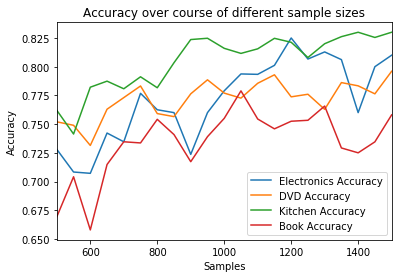

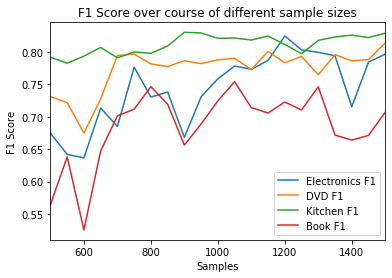

In [22]:
# GRAPHS OF ACCURACY AND F1 SCORE #
# creates graphs to show the change in accuracy and the change in F1 between sample amounts 
samples = [500+(k*50) for k in range(ratios)]

# accuracy graph
graph_acc_data = {'Electronics Accuracy' :  [acc_list[0][k] for k in range(ratios)]}
graph_acc_data['DVD Accuracy'] = [acc_list[1][k] for k in range(ratios)]
graph_acc_data['Kitchen Accuracy'] = [acc_list[2][k] for k in range(ratios)]
graph_acc_data['Book Accuracy'] =  [acc_list[3][k] for k in range(ratios)]
graph_acc_data['Samples'] = samples
graph_acc = pd.DataFrame(graph_acc_data)
graph_acc.set_index('Samples', inplace = True)
graph_acc_plotted = graph_acc.plot(title = 'Accuracy over course of different sample sizes')
graph_acc_plotted.set_ylabel("Accuracy")

# f1 graph
graph_F1_data = {'Electronics F1' : [F1_list[0][k] for k in range(ratios)]}
graph_F1_data['DVD F1'] = [F1_list[1][k] for k in range(ratios)]
graph_F1_data['Kitchen F1'] = [F1_list[2][k] for k in range(ratios)]
graph_F1_data['Book F1'] = [F1_list[3][k] for k in range(ratios)]
graph_F1_data['Samples'] = samples
graph_F1 = pd.DataFrame(graph_F1_data)
graph_F1.set_index('Samples', inplace = True)
graph_F1_plotted = graph_F1.plot(title = 'F1 Score over course of different sample sizes')
graph_F1_plotted.set_ylabel("F1 Score")

print("")

#### Results and Conclusion

The results shown above are using data formed from get training and testing data using the function specified above. Changing the ratios allowed a change in training data size. The lowest ratio used was 0.25 and the highest being 0.75, data is taken on ratios starting at 0.25 with 0.025 intervals between each ratio until 0.75. This gives a 50 sample size increase each time ranging from 500 to 1600. There were 21 classifiers for each domain meaning a total of 84 classifiers each were trained and classified using corresponding test data. Then using a subroutine the accuracy and the F1-score was calculated on each list of classifications. Using Pandas a table and two graphs were drawn to show this data. 

The graphs show that as the samples increase the Accuracy and F1-score also increase. This is what was expected as the classifier will correctly identify more documents if there is more documents it has been trained on. The F1-score was used as this classification is binary so F1-Score is relevant in this case. It is good to see that more correct positive classifications were identified the more samples there were. However, in both graphs the accuracy of classification of Books is low and dips at 1400 samples, this can be classed as an anomaly. In general, the books trend is increasing. In conclusion, the more documents a classifier is trained on the more accurate the classifier is.

b) For each possible combination of source and target domain, **evaluate** the accuracy of a Naive Bayes classifier trained on the source domain and tested on the target domain.  There are four domains so there are 16 possible combinations you should consider.  You should use a table and an appropriate graph(s) to display your results.  Make sure you **discuss** your results and conclusions. \[8 marks\]

In [30]:
""" RUN EACH CODE CELL IN TURN - DONE FOR EFFICIENCY WHILST CODING """
# SETUP #
# creates test and training data
domains = 4
ratios = 3
ratio = 0.5
train_data = [[[] for i in range(domains)] for j in range(ratios)]
test_data = [[[] for i in range (domains)] for j in range(ratios)]

for i in range(ratios):
    train_data[i][0], test_data[i][0] = get_training_test_data("electronics", ratio)
    train_data[i][1], test_data[i][1] = get_training_test_data("dvd", ratio)
    train_data[i][2], test_data[i][2] = get_training_test_data("kitchen", ratio)
    train_data[i][3], test_data[i][3] = get_training_test_data("book", ratio)
    print("Just got training/test data for ratio: {}".format(ratio))
    ratio = float(str(ratio + 0.1) [0:3])


Just got training/test data for ratio: 0.5
Just got training/test data for ratio: 0.6
Just got training/test data for ratio: 0.7


In [31]:
# TRAINING #
# Trains the classifiers with the data
import nltk.classify
classifiers = [[nltk.NaiveBayesClassifier for y in range(domains)] for j in range(ratios)]

for i in range(ratios):
    for j in range(domains):
        classifiers[i][j] = nltk.NaiveBayesClassifier.train(train_data[i][j])
    

In [32]:
# CLASSIFY #
# classifies each classifier with the same test data for that domain into lists of their classification 
classified_list = [[[[""] for x in range(domains)] for y in range(domains)] for z in range(ratios)]

for j in range(ratios):
    for i in range(domains):
        classified_list[j][i][0] = classifiers[j][i].classify_many([tuples[0] for tuples in test_data[j][0]])
        classified_list[j][i][1] = classifiers[j][i].classify_many([tuples[0] for tuples in test_data[j][1]])
        classified_list[j][i][2] = classifiers[j][i].classify_many([tuples[0] for tuples in test_data[j][2]])
        classified_list[j][i][3] = classifiers[j][i].classify_many([tuples[0] for tuples in test_data[j][3]])

In [55]:
# ANALYSIS of Accuracy #
# TP = positive and positive when compared 
# TN = negative and negative when compared
# total = length of tested list

acc_list = [[[0 for x in range(domains)] for y in range(domains)] for z in range(ratios)]

# Finds accuracy given the lists to compare
def find_acc(test_list, result_list):
    j = 0
    tp = 0
    tn = 0
    for result in result_list:
        if result == 'P':
            if result == test_list[j][1]:
                tp += 1
        else:
            if result == test_list[j][1]:
                tn += 1
        j += 1    
    return (tp + tn)/len(result_list)

for j in range(ratios):
    for i in range(domains):
        acc_list[j][i][0] = find_acc(test_data[j][0], classified_list[j][i][0])
        acc_list[j][i][1] = find_acc(test_data[j][1], classified_list[j][i][1])
        acc_list[j][i][2] = find_acc(test_data[j][2], classified_list[j][i][2])
        acc_list[j][i][3] = find_acc(test_data[j][3], classified_list[j][i][3])


In [50]:
# ANALYSIS of F1-Score#
# TP = positive and positive when compared 
# FN = positive and negative when compared
# FP = negative and positive when compared
# p = TP / (TP + FP)
# r = TP / (TP + FN)
# F1 = (2 * p * r)/ (p + r)
# prediction vs label
# same 600 test data every time

F1_list = [[[0 for x in range(domains)] for y in range(domains)] for z in range(ratios)]

# Finds F1 given the lists to compare
def find_F1(test_list, result_list):
    j = 0
    tp = 0
    fp = 0
    fn = 0
    for result in result_list:
        if result == 'P':
            if result == test_list[j][1]:
                tp += 1
            else:
                fp += 1
        else:
            if result != test_list[j][1]:
                fn += 1
        j += 1
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    return (2*p*r)/(p+r)

for j in range(ratios):
    for i in range(domains):
        F1_list[j][i][0] = find_F1(test_data[j][0], classified_list[j][i][0])
        F1_list[j][i][1] = find_F1(test_data[j][1], classified_list[j][i][1])
        F1_list[j][i][2] = find_F1(test_data[j][2], classified_list[j][i][2])
        F1_list[j][i][3] = find_F1(test_data[j][3], classified_list[j][i][3])


In [56]:
# TABLE # 
# creates a table with the set values of Accuracy for the training and testing domains
domain = ['ELECTRONICS', 'DVD', 'KITCHEN', 'BOOK']
data = {'{} Accuracy'.format(domain[k]) : acc_list[2][k] for k in range(domains)}
data['Testing Domain:'] = domain
table = pd.DataFrame(data)
table.set_index('Testing Domain:', inplace = True)
table = table.style.set_caption('Training Domain at ratio 0.7:')
table

,ELECTRONICS Accuracy,DVD Accuracy,KITCHEN Accuracy,BOOK Accuracy
Testing Domain:,,,,
ELECTRONICS,0.76,0.656667,0.718333,0.583333
DVD,0.648333,0.783333,0.675,0.666667
KITCHEN,0.775,0.68,0.83,0.626667
BOOK,0.64,0.715,0.683333,0.725


In [62]:
'Electronics Trained {}'.format(ratio_list[0])

'Electronics Trained 0.5'

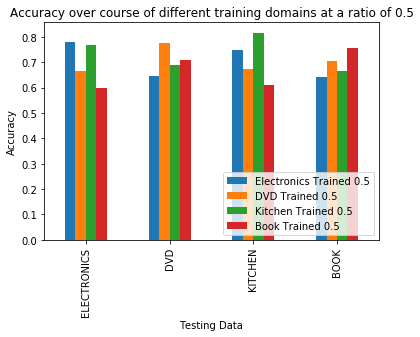

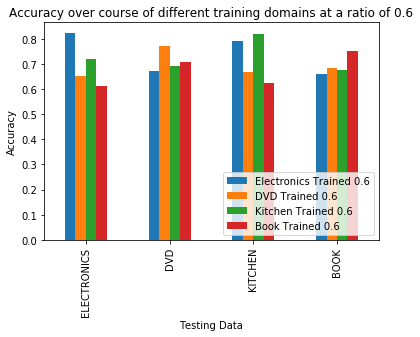

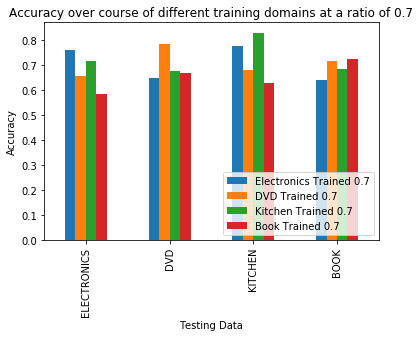

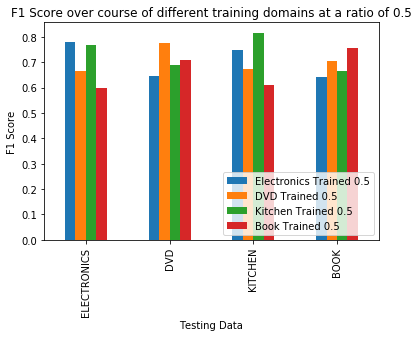

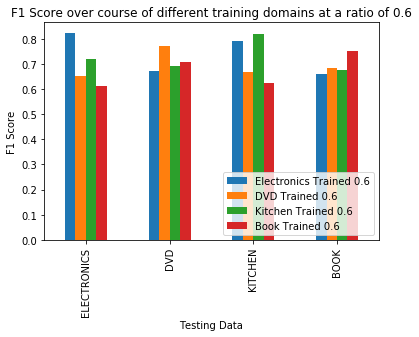

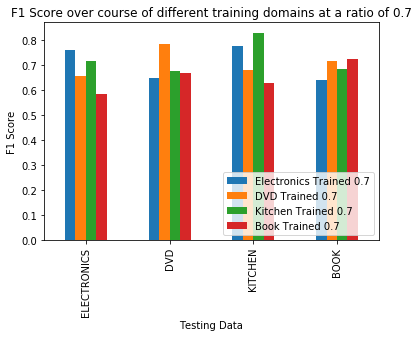

In [100]:
# GRAPH  F1 and Accuracy #
# creates a graph to show the change in accuracy between training and the tested domains 

Testing_Data = ['ELECTRONICS', 'DVD', 'KITCHEN', 'BOOK']
ratio_list = [0.5,0.6,0.7]

# accuracy graph
graph_acc_data = {'Testing Data' : Testing_Data}
for k in range(ratios):
    graph_acc_data['Electronics Trained {}'.format(ratio_list[k])] = acc_list[k][0]
    graph_acc_data['DVD Trained {}'.format(ratio_list[k])] = acc_list[k][1]
    graph_acc_data['Kitchen Trained {}'.format(ratio_list[k])] = acc_list[k][2]
    graph_acc_data['Book Trained {}'.format(ratio_list[k])] =  acc_list[k][3]
graph_acc = pd.DataFrame(graph_acc_data)
graph_acc_ratio1 = ['Electronics Trained 0.5', 'DVD Trained 0.5', 'Kitchen Trained 0.5', 'Book Trained 0.5']
graph_acc_ratio2 = ['Electronics Trained 0.6', 'DVD Trained 0.6', 'Kitchen Trained 0.6', 'Book Trained 0.6']
graph_acc_ratio3 = ['Electronics Trained 0.7', 'DVD Trained 0.7', 'Kitchen Trained 0.7', 'Book Trained 0.7']
graph_acc_plotted1 = graph_acc.plot(x = 'Testing Data', y = graph_acc_ratio1, kind = 'bar', title = 'Accuracy over course of different training domains at a ratio of 0.5')
graph_acc_plotted2 = graph_acc.plot(x = 'Testing Data', y = graph_acc_ratio2, kind = 'bar', title = 'Accuracy over course of different training domains at a ratio of 0.6')
graph_acc_plotted3 = graph_acc.plot(x = 'Testing Data', y = graph_acc_ratio3, kind = 'bar', title = 'Accuracy over course of different training domains at a ratio of 0.7')
graph_acc_plotted1.set_ylabel("Accuracy")
graph_acc_plotted1.legend(loc = 4)
graph_acc_plotted2.set_ylabel("Accuracy")
graph_acc_plotted2.legend(loc = 4)
graph_acc_plotted3.set_ylabel("Accuracy")
graph_acc_plotted3.legend(loc = 4)

# f1 graph
graph_F1_data = {'Testing Data' : Testing_Data}
for k in range(ratios):
    graph_F1_data['Electronics Trained {}'.format(ratio_list[k])] = F1_list[k][0]
    graph_F1_data['DVD Trained {}'.format(ratio_list[k])] = F1_list[k][1]
    graph_F1_data['Kitchen Trained {}'.format(ratio_list[k])] = F1_list[k][2]
    graph_F1_data['Book Trained {}'.format(ratio_list[k])] =  F1_list[k][3]
graph_F1 = pd.DataFrame(graph_F1_data)
graph_F1_ratio1 = ['Electronics Trained 0.5', 'DVD Trained 0.5', 'Kitchen Trained 0.5', 'Book Trained 0.5']
graph_F1_ratio2 = ['Electronics Trained 0.6', 'DVD Trained 0.6', 'Kitchen Trained 0.6', 'Book Trained 0.6']
graph_F1_ratio3 = ['Electronics Trained 0.7', 'DVD Trained 0.7', 'Kitchen Trained 0.7', 'Book Trained 0.7']
graph_F1_plotted1 = graph_acc.plot(x = 'Testing Data', y = graph_F1_ratio1, kind = 'bar', title = 'F1 Score over course of different training domains at a ratio of 0.5')
graph_F1_plotted2 = graph_acc.plot(x = 'Testing Data', y = graph_F1_ratio2, kind = 'bar', title = 'F1 Score over course of different training domains at a ratio of 0.6')
graph_F1_plotted3 = graph_acc.plot(x = 'Testing Data', y = graph_F1_ratio3, kind = 'bar', title = 'F1 Score over course of different training domains at a ratio of 0.7')
graph_F1_plotted1.set_ylabel("F1 Score")
graph_F1_plotted1.legend(loc = 4)
graph_F1_plotted2.set_ylabel("F1 Score")
graph_F1_plotted2.legend(loc = 4)
graph_F1_plotted3.set_ylabel("F1 Score")
graph_F1_plotted3.legend(loc = 4)

print("")

#### Results and Conclusion

My results are calculated by taking 3 sizes of ratios, and training a classifier for each domain for that ratio. Each classifier is then tasked with classifying each domains test data for that classifier's ratio. Once classified, each list is compared with the actual classification to determine accuracy and F1-score, which is relevant as the classifier is binary. Once calculated I took each of the values and plotted bar graphs of F1-score and accuracy for each ratio. I took 3 ratios in order to make sure that my results were correct and accurate. As the question states that it wants a single table, the table consists of the accuracy of the training data at a ratio of 0.7, tested on testing data that is at a ratio of 0.3, as 1 - 0.7 = 0.3. This gives an overview of the data but not all of it. The graphs show accuracy and F1-score for all ratios tested. These were done in bars to increase the ease of comparison.

The graphs show that for each domain if the domain trained is the same as the domain tested then the accuracy and F1-score is better. The graphs also show that training and testing on Electronics and Kitchen, either way round, the classifier can accurately determine the correct classification, which is an interesting point to take away. In conclusion, the classifier is most accurate when determining testing data from the same domain as the training data.

c) Adapt your code so that you can build and use a training set built from multiple categories.  Now **investigate** how having a mixture of source domains affects the accuracy of the Naive Bayes classifier on the target domain.  Make sure you control for or consider how much any improvements are due to the quantity of the training data. \[9 marks\]

In [110]:
""" RUN EACH CODE CELL IN TURN - DONE FOR EFFICIENCY WHILST CODING """
# SETUP #
# creates test and training data
domains = 4
train_data = [[] for i in range(domains)]
test_data = [[] for i in range(domains)]
train_data[0], test_data[0] = get_training_test_data("electronics")
train_data[1], test_data[1] = get_training_test_data("dvd")
train_data[2], test_data[2] = get_training_test_data("kitchen")
train_data[3], test_data[3] = get_training_test_data("book")

In [111]:
# TRAINING #
# restrict amount of data from each class = 1200
# therefore 1200, 600, 400, 300 from each domain as the domains increase
# Trains the classifiers according to the amount of domains required 
import nltk.classify
classifiers = [[nltk.NaiveBayesClassifier for x in range(6)] for y in range(domains)]
amount_of_data = 1200

# 1 domain
for i in range(4):
    classifiers[0][i] = nltk.NaiveBayesClassifier.train(random.sample(train_data[i], amount_of_data))

# 2 domains
# domains 01 02 03
amount_of_data = 600
for i in range(3):
    classifiers[1][i] = nltk.NaiveBayesClassifier.train(
        random.sample(train_data[0], amount_of_data) + random.sample(train_data[i+1], amount_of_data))   
# domains 12 13
for i in range(2):
    classifiers[1][i+3] = nltk.NaiveBayesClassifier.train(
        random.sample(train_data[1], amount_of_data) + random.sample(train_data[i+2], amount_of_data))
# domain 23
classifiers[1][5] = nltk.NaiveBayesClassifier.train(
    random.sample(train_data[2], amount_of_data) + random.sample(train_data[3], amount_of_data))

# 3 domains
# 012 013 023 123
amount_of_data = 400
classifiers[2][0] = nltk.NaiveBayesClassifier.train(
    random.sample(train_data[0], amount_of_data) + random.sample(train_data[1], amount_of_data) + random.sample(train_data[2], amount_of_data))
classifiers[2][1] = nltk.NaiveBayesClassifier.train(
    random.sample(train_data[0], amount_of_data) + random.sample(train_data[1], amount_of_data) + random.sample(train_data[3], amount_of_data))
classifiers[2][2] = nltk.NaiveBayesClassifier.train(
    random.sample(train_data[0], amount_of_data) + random.sample(train_data[2], amount_of_data) + random.sample(train_data[3], amount_of_data))
classifiers[2][3] = nltk.NaiveBayesClassifier.train(
    random.sample(train_data[1], amount_of_data) + random.sample(train_data[2], amount_of_data) + random.sample(train_data[3], amount_of_data))

# 4 domains
# 0123
amount_of_data = 300
classifiers[3][0] = nltk.NaiveBayesClassifier.train(
    random.sample(train_data[0], amount_of_data) + random.sample(train_data[1], amount_of_data) + 
    random.sample(train_data[2], amount_of_data) + random.sample(train_data[3], amount_of_data))  


In [112]:
# CLASSIFY #
# classifies each classifier with the same test data for that domain into lists of their classification 
# classify list - Amount of domains, Domain, classified data
classifications = domains*2
classified_list = [[[""] for x in range(classifications)] for y in range(domains)]
list_current = 0

# 1 domain - classify Electronics with Electronics Test
for i in range(domains):
    classified_list[i][list_current] = classifiers[0][i].classify_many([tuples[0] for tuples in test_data[i]])
    
# 2 domains
list_current = 1
# 0 domain classification
classified_list[0][0+list_current] = classifiers[1][0].classify_many([tuples[0] for tuples in test_data[0]])
classified_list[0][1+list_current] = classifiers[1][1].classify_many([tuples[0] for tuples in test_data[0]])
classified_list[0][2+list_current] = classifiers[1][2].classify_many([tuples[0] for tuples in test_data[0]])

# 1 domain classification
classified_list[1][0+list_current] = classifiers[1][0].classify_many([tuples[0] for tuples in test_data[1]])
classified_list[1][1+list_current] = classifiers[1][3].classify_many([tuples[0] for tuples in test_data[1]])
classified_list[1][2+list_current] = classifiers[1][4].classify_many([tuples[0] for tuples in test_data[1]])

# 2 domain classification
classified_list[2][0+list_current] = classifiers[1][1].classify_many([tuples[0] for tuples in test_data[2]])
classified_list[2][1+list_current] = classifiers[1][3].classify_many([tuples[0] for tuples in test_data[2]])
classified_list[2][2+list_current] = classifiers[1][5].classify_many([tuples[0] for tuples in test_data[2]])

# 3 domain classification
classified_list[3][0+list_current] = classifiers[1][2].classify_many([tuples[0] for tuples in test_data[3]])
classified_list[3][1+list_current] = classifiers[1][4].classify_many([tuples[0] for tuples in test_data[3]])
classified_list[3][2+list_current] = classifiers[1][5].classify_many([tuples[0] for tuples in test_data[3]])

# 3 domains
list_current = 4
# 0 domain classification
classified_list[0][0+list_current] = classifiers[2][0].classify_many([tuples[0] for tuples in test_data[0]])
classified_list[0][1+list_current] = classifiers[2][1].classify_many([tuples[0] for tuples in test_data[0]])
classified_list[0][2+list_current] = classifiers[2][2].classify_many([tuples[0] for tuples in test_data[0]])

# 1 domain classification
classified_list[1][0+list_current] = classifiers[2][0].classify_many([tuples[0] for tuples in test_data[1]])
classified_list[1][1+list_current] = classifiers[2][1].classify_many([tuples[0] for tuples in test_data[1]])
classified_list[1][2+list_current] = classifiers[2][3].classify_many([tuples[0] for tuples in test_data[1]])

# 2 domain classification
classified_list[2][0+list_current] = classifiers[2][0].classify_many([tuples[0] for tuples in test_data[2]])
classified_list[2][1+list_current] = classifiers[2][2].classify_many([tuples[0] for tuples in test_data[2]])
classified_list[2][2+list_current] = classifiers[2][3].classify_many([tuples[0] for tuples in test_data[2]])

# 3 domain classification
classified_list[3][0+list_current] = classifiers[2][1].classify_many([tuples[0] for tuples in test_data[3]])
classified_list[3][1+list_current] = classifiers[2][2].classify_many([tuples[0] for tuples in test_data[3]])
classified_list[3][2+list_current] = classifiers[2][3].classify_many([tuples[0] for tuples in test_data[3]])

# 4 domains
list_current = 7
for i in range(domains):
    classified_list[i][0+list_current] = classifiers[3][0].classify_many([tuples[0] for tuples in test_data[i]])
    

In [113]:
# ANALYSIS of F1-Score#
# TP = positive and positive when compared 
# FN = positive and negative when compared
# FP = negative and positive when compared
# p = TP / (TP + FP)
# r = TP / (TP + FN)
# F1 = (2 * p * r)/ (p + r)
# prediction vs label
# same 600 test data every time
# Takes the classification in and averages it for each domain and amount of domains

F1_list = [[0 for x in range(classifications)] for y in range(domains)]

# Finds F1 given the lists to compare
def find_F1(test_list, result_list):
    j = 0
    tp = 0
    fp = 0
    fn = 0
    for result in result_list:
        if result == 'P':
            if result == test_list[j][1]:
                tp += 1
            else:
                fp += 1
        else:
            if result != test_list[j][1]:
                fn += 1
        j += 1
    p = tp / (tp + fp)
    r = tp / (tp + fn)
    return (2*p*r)/(p+r)

# 1 domain
for i in range(domains):
    F1_list[i][0] = find_F1(test_data[i], classified_list[i][0])

# 2 domains
for i in range(domains):
    F1_list[i][1] = find_F1(test_data[i], classified_list[i][1])
    F1_list[i][2] = find_F1(test_data[i], classified_list[i][2])
    F1_list[i][3] = find_F1(test_data[i], classified_list[i][3])

# 3 domains
for i in range(domains):
    F1_list[i][4] = find_F1(test_data[i], classified_list[i][4])
    F1_list[i][5] = find_F1(test_data[i], classified_list[i][5])
    F1_list[i][6] = find_F1(test_data[i], classified_list[i][6])
    
# 4 domains
for i in range(domains):
    F1_list[i][7] = find_F1(test_data[i], classified_list[i][7])

    

In [114]:
# ANALYSIS of Accuracy #
# TP = positive and positive when compared 
# TN = negative and negative when compared
# total = length of tested list

acc_list = [[0 for x in range(classifications)] for y in range(domains)]

# Finds accuracy given the lists to compare
def find_acc(test_list, result_list):
    j = 0
    tp = 0
    tn = 0
    for result in result_list:
        if result == 'P':
            if result == test_list[j][1]:
                tp += 1
        else:
            if result == test_list[j][1]:
                tn += 1
        j += 1    
    return (tp + tn)/len(result_list)

# 1 domain
for i in range(domains):
    acc_list[i][0] = find_acc(test_data[i], classified_list[i][0])

# 2 domains
for i in range(domains):
    acc_list[i][1] = find_acc(test_data[i], classified_list[i][1])
    acc_list[i][2] = find_acc(test_data[i], classified_list[i][2])
    acc_list[i][3] = find_acc(test_data[i], classified_list[i][3])

# 3 domains
for i in range(domains):
    acc_list[i][4] = find_acc(test_data[i], classified_list[i][4])
    acc_list[i][5] = find_acc(test_data[i], classified_list[i][5])
    acc_list[i][6] = find_acc(test_data[i], classified_list[i][6])
    
# 4 domains
for i in range(domains):
    acc_list[i][7] = find_acc(test_data[i], classified_list[i][7])


In [117]:
# TABLE # 
# creates a table with the set values of F1 for the domains and amount of domains
domain = ['ELECTRONICS', 'DVD', 'KITCHEN', 'BOOK']
data = {domain[k] : F1_list[k] for k in range(domains)}
data['Domain No:'] = ['1 Test 1', '2 Test 1', '2 Test 2', '2 Test 3', '3 Test 1','3 Test 2','3 Test 3','4 Test 1']
table = pd.DataFrame(data)
table.set_index('Domain No:', inplace = True)
table = table.style.set_caption('Domain:')
table

,ELECTRONICS,DVD,KITCHEN,BOOK
Domain No:,,,,
1 Test 1,0.716832,0.790769,0.836735,0.591422
2 Test 1,0.611714,0.610526,0.788091,0.598253
2 Test 2,0.714286,0.741155,0.683544,0.769481
2 Test 3,0.663934,0.707457,0.668041,0.717117
3 Test 1,0.544186,0.565702,0.74031,0.715026
3 Test 2,0.715105,0.734317,0.742647,0.705686
3 Test 3,0.606061,0.653465,0.707269,0.670543
4 Test 1,0.728653,0.767442,0.734545,0.736508


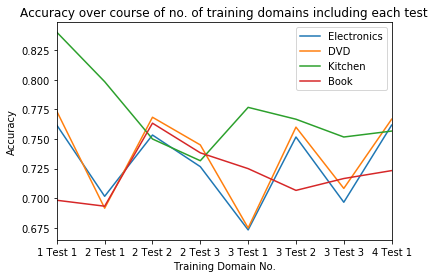

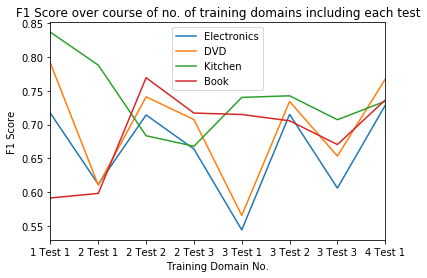

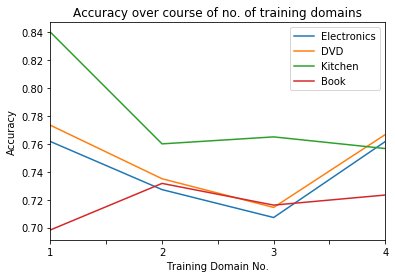

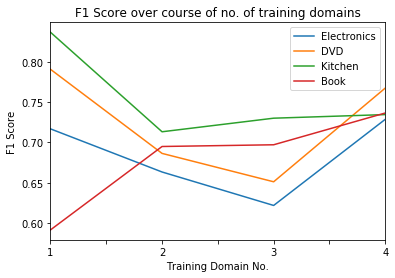

In [122]:
# GRAPH #
# creates a graph to show the change in accuracy between no. of training domains and domain

graph_acc_data= {'Electronics' : acc_list[0]}
graph_acc_data['DVD'] = acc_list[1] 
graph_acc_data['Kitchen'] = acc_list[2]
graph_acc_data['Book'] = acc_list[3]
graph_acc_data['Training Domain No.'] = ['1 Test 1', '2 Test 1', '2 Test 2', '2 Test 3', '3 Test 1','3 Test 2','3 Test 3','4 Test 1']
graph_acc = pd.DataFrame(graph_acc_data)
graph_acc.set_index('Training Domain No.', inplace = True)
graph_plotted_acc = graph_acc.plot(title = 'Accuracy over course of no. of training domains including each test')
graph_plotted_acc.set_ylabel("Accuracy")

graph_F1_data= {'Electronics' : F1_list[0]}
graph_F1_data['DVD'] = F1_list[1] 
graph_F1_data['Kitchen'] = F1_list[2]
graph_F1_data['Book'] = F1_list[3]
graph_F1_data['Training Domain No.'] = ['1 Test 1', '2 Test 1', '2 Test 2', '2 Test 3', '3 Test 1','3 Test 2','3 Test 3','4 Test 1']
graph_F1 = pd.DataFrame(graph_F1_data)
graph_F1.set_index('Training Domain No.', inplace = True)
graph_plotted_F1 = graph_F1.plot(title = 'F1 Score over course of no. of training domains including each test')
graph_plotted_F1.set_ylabel("F1 Score")

graph2_acc_data= {'Electronics' : [acc_list[0][0], (acc_list[0][1] + acc_list[0][2] + acc_list[0][3])/3, 
                                   (acc_list[0][4] + acc_list[0][5] + acc_list[0][6])/3, acc_list[0][7]]}
graph2_acc_data['DVD'] = [acc_list[1][0], (acc_list[1][1] + acc_list[1][2] + acc_list[1][3])/3, 
                                   (acc_list[1][4] + acc_list[1][5] + acc_list[1][6])/3, acc_list[1][7]]
graph2_acc_data['Kitchen'] = [acc_list[2][0], (acc_list[2][1] + acc_list[2][2] + acc_list[2][3])/3, 
                                   (acc_list[2][4] + acc_list[2][5] + acc_list[2][6])/3, acc_list[2][7]]
graph2_acc_data['Book'] = [acc_list[3][0], (acc_list[3][1] + acc_list[3][2] + acc_list[3][3])/3, 
                                   (acc_list[3][4] + acc_list[3][5] + acc_list[3][6])/3, acc_list[3][7]]
graph2_acc_data['Training Domain No.'] = ['1', '2', '3','4']
graph2_acc = pd.DataFrame(graph2_acc_data)
graph2_acc.set_index('Training Domain No.', inplace = True)
graph2_plotted_acc = graph2_acc.plot(title = 'Accuracy over course of no. of training domains')
graph2_plotted_acc.set_ylabel("Accuracy")

graph2_F1_data= {'Electronics' : [F1_list[0][0], (F1_list[0][1] + F1_list[0][2] + F1_list[0][3])/3, 
                                   (F1_list[0][4] + F1_list[0][5] + F1_list[0][6])/3, F1_list[0][7]]}
graph2_F1_data['DVD'] = [F1_list[1][0], (F1_list[1][1] + F1_list[1][2] + F1_list[1][3])/3, 
                                   (F1_list[1][4] + F1_list[1][5] + F1_list[1][6])/3, F1_list[1][7]] 
graph2_F1_data['Kitchen'] = [F1_list[2][0], (F1_list[2][1] + F1_list[2][2] + F1_list[2][3])/3, 
                                   (F1_list[2][4] + F1_list[2][5] + F1_list[2][6])/3, F1_list[2][7]]
graph2_F1_data['Book'] = [F1_list[3][0], (F1_list[3][1] + F1_list[3][2] + F1_list[3][3])/3, 
                                   (F1_list[3][4] + F1_list[3][5] + F1_list[3][6])/3, F1_list[3][7]]
graph2_F1_data['Training Domain No.'] = ['1', '2', '3','4']
graph2_F1 = pd.DataFrame(graph2_F1_data)
graph2_F1.set_index('Training Domain No.', inplace = True)
graph2_F1_plotted = graph2_F1.plot(title = 'F1 Score over course of no. of training domains')
graph2_F1_plotted.set_ylabel("F1 Score")

print("")

#### Results and Conclusion

My results are calculated by taking training data and sampling different amounts of it so that each amount of domains i.e 1 domain 2 domains etc. each have the same amount of training data, so as its capped at 1200, for the 4 domain trained classifier it has 300 training data from each domain. Each classifier is trained with a different combination of training data for example Electronics and DVDs, and another might have DVDs and Books. Each classifier is then tested against test data that it has been trained with, for example the Electronics and DVDs classifier is classified against DVD test data and Electronics test data but nothing else. Once the classifying is complete the accuracy and F1-score for each classified list is calculated. F1 score is used as this is a binary classification of positive or negative so it gives us more of a scope on how accurate the classifiers are. Once this is done a table was made for each test that was against each domain, 1 for 1 tested domain, 3 for 2 tested domains, 3 for 3 tested domains and 1 for 4 tested domains. Graphs were then drawn to represent this.

The graphs show each test that I did against the domains. They also show the average for each training domain number. The results are intresting as there is not a clear upward or downward trend for each of the domains. Drawing a line of best fit might be more helpful here. Never the less, the graph shows that the more domains decreases the accuracy and F1-Score of the classifier for the domain kitchen. However, the book domain shows a slight increase in accuracy and a greater increase in F1-Score when more domains are trained and tested on this domain. As for DVD and Electronics domains, there is not enough change to conclude whether more domains increase or decrease accuracy and F1-Score. Intrestingly though, when tested on 2 or 3 domains both DVD and Electronics did worse than on 1 and 4 domains. In conclusion, the results are a little confusing due to the decrease in each domain's training data when the amount of domains increased. This experiment was related to domains, and therefore the amount of training data the classifier was trained on should stay the same. The graphs do show that less efficient domains such as Books, are more accurate the more domains you train them on. By contrast, domains that are efficient to being with such as Kitchen, are less accurate the more domains you train them on.

Use the code below to verify that the length of your submission does not exceed 2000 words.

In [123]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 1202

import io
from nbformat import current

filepath="a1.ipynb"
question_count=748

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1411
